In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
import joblib


In [2]:
california = fetch_california_housing(as_frame = True)

In [3]:
california

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [4]:
x = california.data
y = california.target

In [5]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [8]:
print("Training set:", x_train.shape, y_train.shape)
print("Testing set:", x_test.shape, y_test.shape)

Training set: (16512, 8) (16512,)
Testing set: (4128, 8) (4128,)


In [9]:
scaler = StandardScaler()

In [10]:
x_train_scaled = scaler.fit_transform(x_train)

In [11]:
x_test_scaled = scaler.transform(x_test)

In [15]:
xgb_baseline = XGBRegressor()

In [17]:
xgb_baseline.fit(x_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
y_pred = xgb_baseline.predict(x_test_scaled)

In [22]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.21193078794858924


In [23]:
# print(classification_report(y_test, y_pred)) # This is for classification, not regression
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.8435143647938855


In [24]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.01, 0.1, 0,2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

In [25]:
grid_search = GridSearchCV(
    estimator = xgb_baseline,
    param_grid = param_grid,
    scoring = "r2",
    cv = 5,
    verbose = 1,
    n_jobs = 1
)

In [26]:
grid_search.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0, 2],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='r2', verbose=1)

In [28]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 0.8}

In [29]:
grid_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [30]:
best_params = grid_search.best_params_

In [33]:
xgb_final = XGBRegressor(**best_params)

In [34]:
xgb_final.fit(x_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [35]:
importances = xgb_final.feature_importances_

In [36]:
importances

array([0.41860533, 0.06390338, 0.09553955, 0.02687483, 0.01961007,
       0.13595694, 0.12267727, 0.11683267], dtype=float32)

In [37]:
features = x.columns

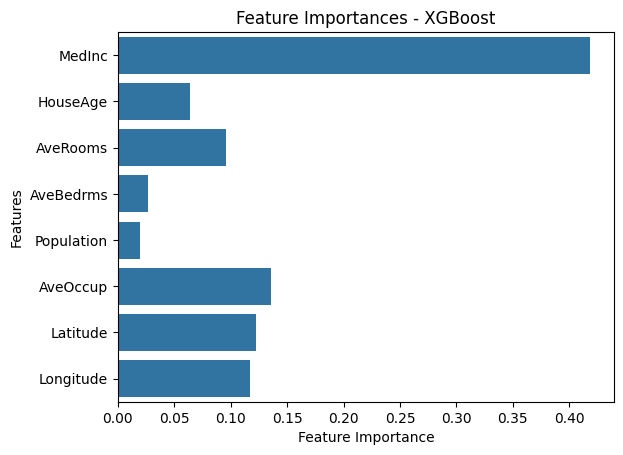

In [42]:
features = x.columns
sns.barplot(x = importances, y= features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title("Feature Importances - XGBoost")
plt.show()

In [43]:
joblib.dump(xgb_final, "xbg_california_model.pkl")

['xbg_california_model.pkl']